## What could be the price for used car based on  features? 

### Outline

    1) Introduction
   -  Recap Problem statement
  
   2) Data Wrangling and Preparation
  -  Source and load the data
  
 3) Explore the data
  -  Clean and transform that data i.e. handling missing data, removing duplicates
  
 4) Answer Research Questions by:
 -  Visualizing data relationships i.e. correlation heatmaps, pairplots, etc.
 
 5) Creating and identifying features
 -  Pre-processing and Testing Data, and Modeling
 -  Create dummy or indicator features for categorical variables
 -  Standardize the magnitude of numeric features
 -  Split into testing and training datasets
 -  Create dummy or indicator features for categorical variables
 -  Standardize the magnitude of numeric features
 -  Split into testing and training datasets
 
 6) Documentaion
 -  Presenting and sharing your findings (data storytelling)
 -  Finalizing code
 
 7) Report

### Introduction

This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.We will look into this dataset and predict the best price for used car.

### Objectives 


-  We chose the used car dataset and will take the following steps to make conclusions about what are the factors affect price listings:

-  First Look at the Data:

-  What infomation is present? What information is missing? Discover general facts such as host listings count.
   Initial Data Preparation:

-  Remove irrelevant information, reformat the data and input missing values
   Find high level trends and correlation

-  Use Machine Learning for further analysis:

-  Encode categorical features correctly
-  Train more than one model and look for feature importance and model prediction

### Problem statement 

What is the price of a used car?  What are the features one should look into before buying a car based on given features and factors such as brand or company,manufacturing year,mileage, Accident History,Engine Type etc. in order to buy more used cars.


### Import Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

### Data Wrangling

### Load Data

In [2]:
car_cap = pd.read_csv('used_cars.csv')
car_cap

brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006            NaN                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title     price  
0     At least 1 accident or damage reported         Yes   $10,300  
1     At least 1 accident or damage reported         Yes   $38,005  
2                              None reported         NaN   $54,598  
3                              None reported         Yes   $15,500  
4                              None reported         NaN   $34,999  
...                                      ...         ...       ...  
4004                           None reported         Yes  $349,950  
4005                           None reported         Yes   $53,900  
4006                           None reported         NaN   $90,998  
4007                           None reported         Yes   $62,999  
4008  At least 1 accident or damage reported         Yes   $40,000  

[4009 rows x 12 columns]

### Explore The Data

In [3]:
# Find out the number of rows and columns in data
car_cap.shape

(4009, 12)

-  we have 4009 rows and 12 columns in our dataset.

In [4]:
# list of columns 
car_cap.columns.values.tolist()

['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [5]:
#To get a concise summary of the dataframe.
car_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


-  We have some missing values in  fuel_type,accident,clean_title.

In [6]:
car_cap.describe()

model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000

-  We have only one numeric value model year.  But we have to see other data types which could possiblely be integer. 

In [7]:
# Data types of columns 
car_cap.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

-  Maximum data type is objective type data except Model_year. Although Price and milage should be integer.

### Fix the data type

-  we will change the data type by removing mi. in milage , and $ sign from price 

In [8]:
# Create new Fature named 'prices'
# Contains Price converted to int dtype 

def return_prices(y):
    a = int((y.replace(',','')).replace('$',''))
    return a
    
car_cap['prices'] = car_cap['price'].map(return_prices)
car_cap.drop('price', axis=1, inplace=True)

In [9]:
# Create new Fature named 'milages'
# Contains Milage converted to int dtype 

def return_milages(x):
    b = int((x.replace(',','')).replace('mi.',''))
    return b
    
car_cap['milages'] = car_cap['milage'].map(return_milages)
car_cap.drop('milage', axis=1, inplace=True)

In [10]:
car_cap.head(2)

brand                            model  model_year      fuel_type  \
0     Ford  Utility Police Interceptor Base        2013  E85 Flex Fuel   
1  Hyundai                     Palisade SEL        2021       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   

           ext_col int_col                                accident  \
0            Black   Black  At least 1 accident or damage reported   
1  Moonlight Cloud    Gray  At least 1 accident or damage reported   

  clean_title  prices  milages  
0         Yes   10300    51000  
1         Yes   38005    34742

In [11]:
car_cap.dtypes

brand           object
model           object
model_year       int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
prices           int64
milages          int64
dtype: object

Now we have price and milage in int. data type.

In [12]:
car_cap.describe().T

count          mean           std     min      25%      50%  \
model_year  4009.0   2015.515590      6.104816  1974.0   2012.0   2017.0   
prices      4009.0  44553.190322  78710.635554  2000.0  17200.0  31000.0   
milages     4009.0  64717.551010  52296.599459   100.0  23044.0  52775.0   

                75%        max  
model_year   2020.0     2024.0  
prices      49990.0  2954083.0  
milages     94100.0   405000.0

Five point summmary shows-
-  model year have not skewed and maximum value is 2024 and min is 1974.that means we have data from 1974-2024.
-  Price is more skewed to right side as we have lower mean than median.. Max price of the car is 2954083, min is 2000.
-  Milage is not that much skewed and max milage us 405000 and min is 100.
-  we have some outliers present in price and milage as a difference in max and mean value.

### Find missing values 

In [13]:
Total_null = car_cap.isnull().sum()
Percentage =  car_cap.isnull().sum()*100/car_cap.isnull().count().sort_values(ascending=False) 
print('Missing Values')
missing_data = pd.concat([Total_null, Percentage], axis = 1, keys = ['Total', '%'])    
missing_data

Missing Values


Total          %
brand             0   0.000000
model             0   0.000000
model_year        0   0.000000
fuel_type       170   4.240459
engine            0   0.000000
transmission      0   0.000000
ext_col           0   0.000000
int_col           0   0.000000
accident        113   2.818658
clean_title     596  14.866550
prices            0   0.000000
milages           0   0.000000

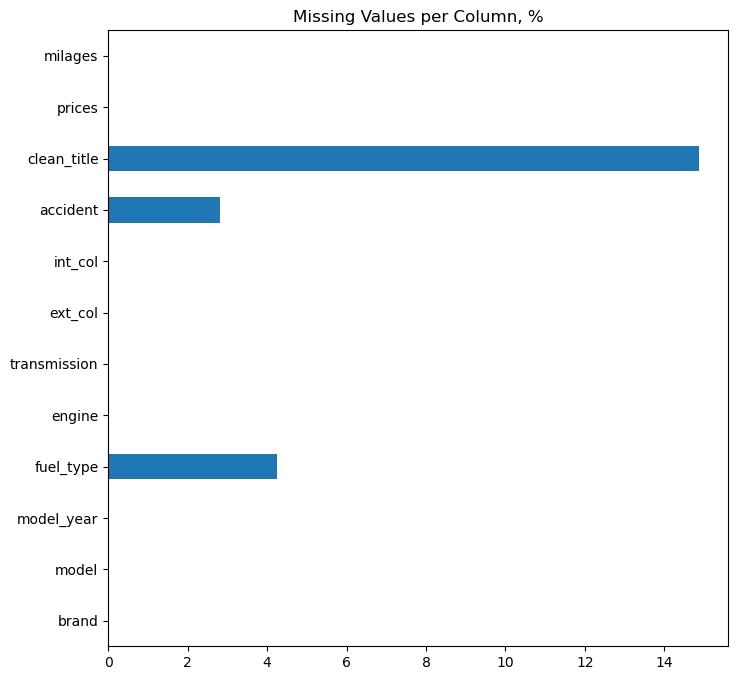

In [14]:
# plot the % results with overview of features with missing values
# ';'at the end of the line is a Jupyter notebook syntax to suppress the output of the plot object.
missing_data['%'].plot(kind='barh', title='Missing Values per Column, %', figsize=(8,8));

-  we have some misisng values in fuel_type,accident,clean_titl. Among all three we have high missing values in clean_title that is 596,than fuel type is 170 and lastly accident 113.

In [15]:
# Check Duplication
car_cap.duplicated().sum()

0

In [16]:
# Check the number of unique values of each column
car_cap.nunique()

brand             57
model           1898
model_year        34
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
prices          1569
milages         2818
dtype: int64

-  clean title, accident, accident have least unique values which we will further evaulate in pre-processing.

In [17]:
# Select categorical features
car_cap_cat = car_cap.select_dtypes(include = 'object').columns
car_cap_cat

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [18]:
car_cap['prices'].isnull().sum()

0

-  Price is our Traget value and it has no missing value.

# 2.1 Exploratory Data Analysis

Exaploratory analysis provide us insight by using graphs and shows us relationship between different variables.

### Univariate analysis

In this we will explores each variable in a data set, separately.

###### Price

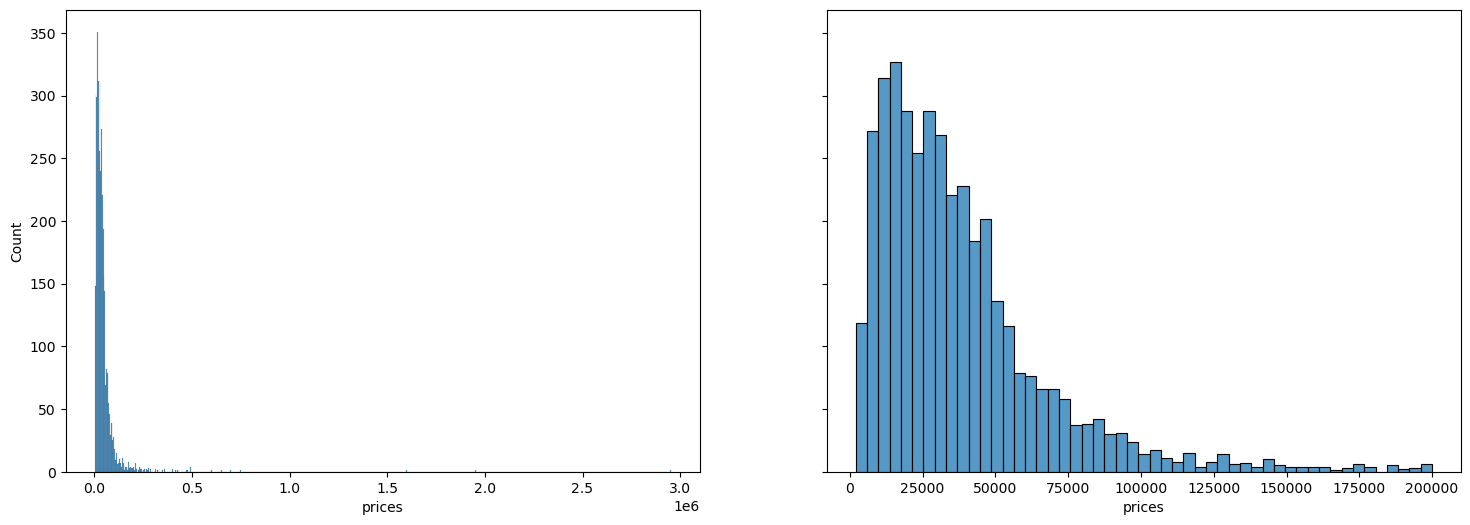

In [19]:
fig, axes = plt.subplots(1,2, figsize = (18,6), sharey = True)

#axes[0].set_ylabel('asdjas')
sns.histplot(data = car_cap['prices'], ax = axes[0])
sns.histplot(data = car_cap[car_cap['prices']<=200000]['prices'], ax = axes[1])

plt.show()

-   Listing of car's price is from lowest to highest. WE have high pricey car is around $2954083 and lowest is 2000.

###### Model year

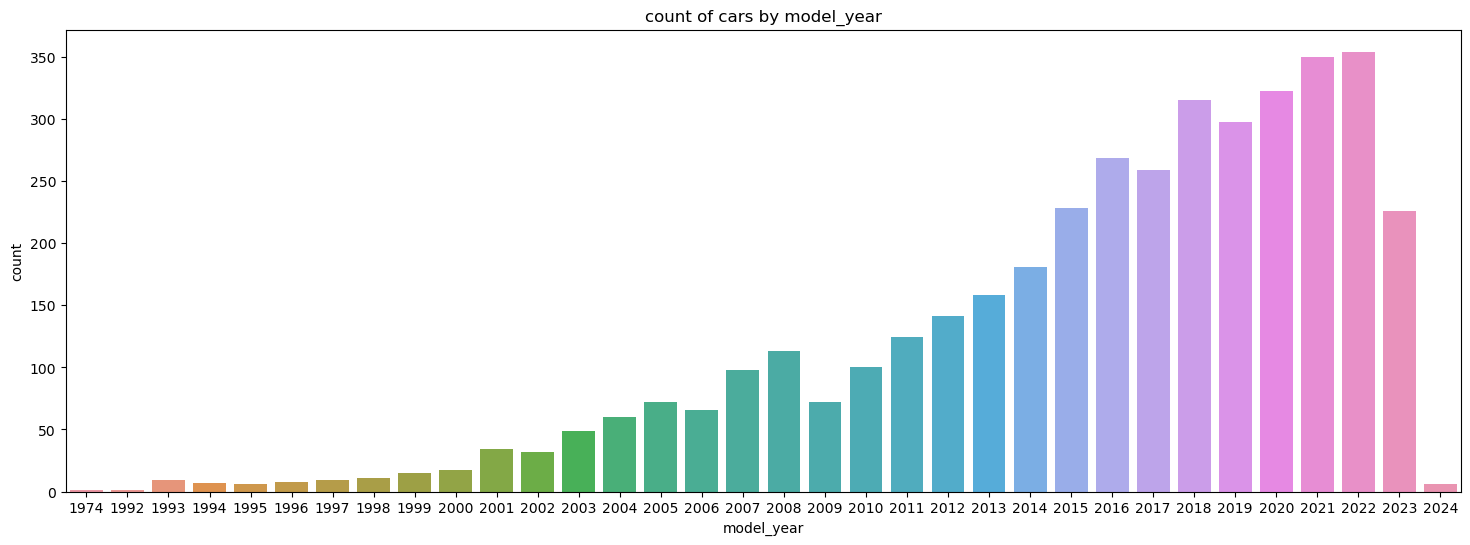

In [20]:
# univariate analysis on year
plt.figure(figsize = (18,6))
sns.countplot(data = car_cap,x = "model_year")
plt.title("count of cars by model_year")
plt.show()

Above visualization we can clearly see that
-  Most of the cars manufactured in 2022. Last Spike of car manufacture was in 2008 and gradually increased 2015 to 2022.
-  Cars with the model year 2022 have the highest count and lowest in 1974 and dropped after 2023 specially in 2024.

###### Milage

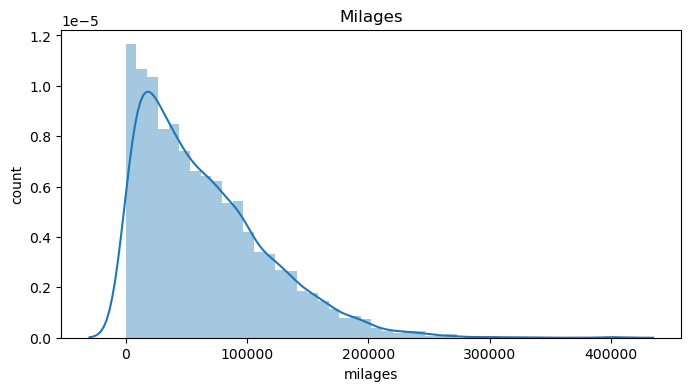

In [21]:
# univariate analysis on milage
plt.figure(figsize = (8,4))
sns.distplot(car_cap["milages"])
plt.title("Milages")
plt.ylabel("count")
plt.show()

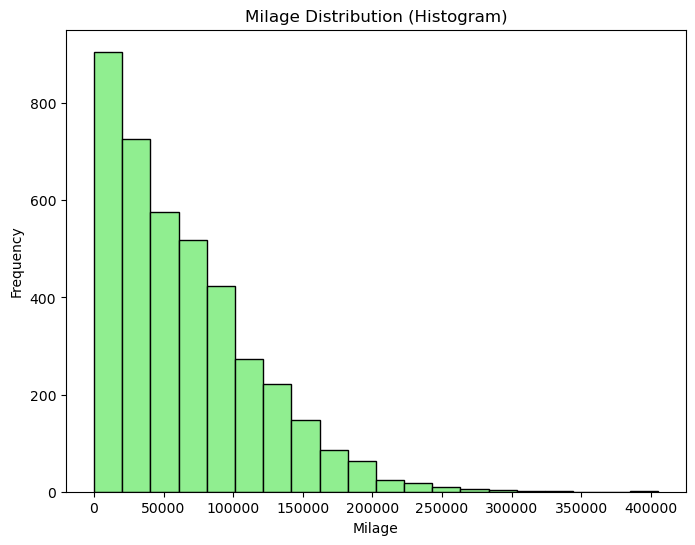

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(car_cap['milages'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

-  We have miages from 1000 mi. to 99,999 mi. and accoring to milage one can get idea about wear and tear of the car.

###### Fuel type

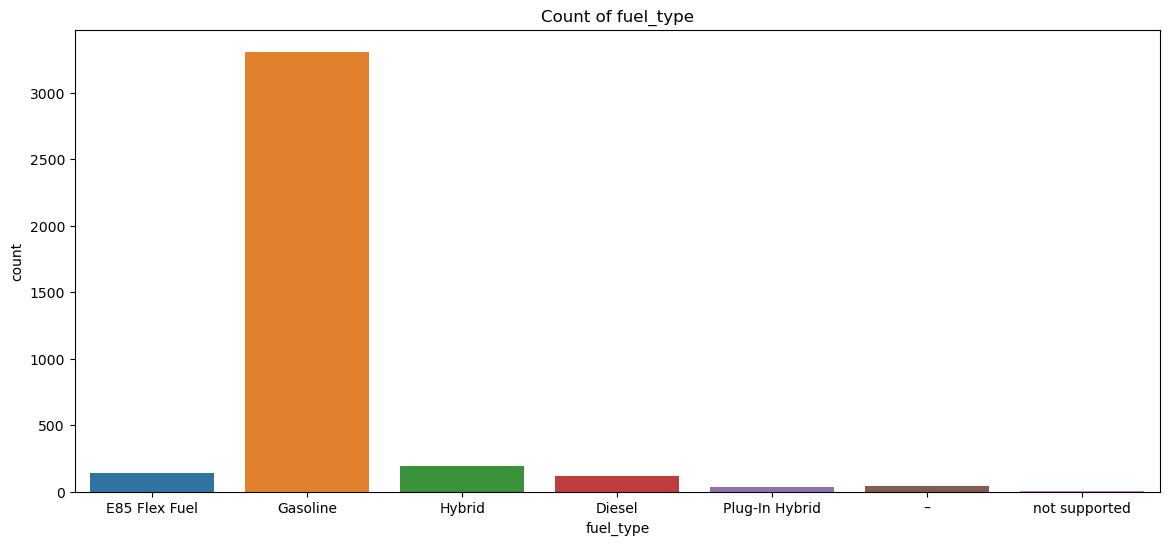

In [23]:
# univariate analysis on fuel_type
plt.figure(figsize = (14,6))
sns.countplot(data = car_cap, x = "fuel_type")
plt.title("Count of fuel_type")
plt.show()

- Gasoline cars are mostly sold than Plug-in-hybride. Also have some missing data in this.

###### Transmission

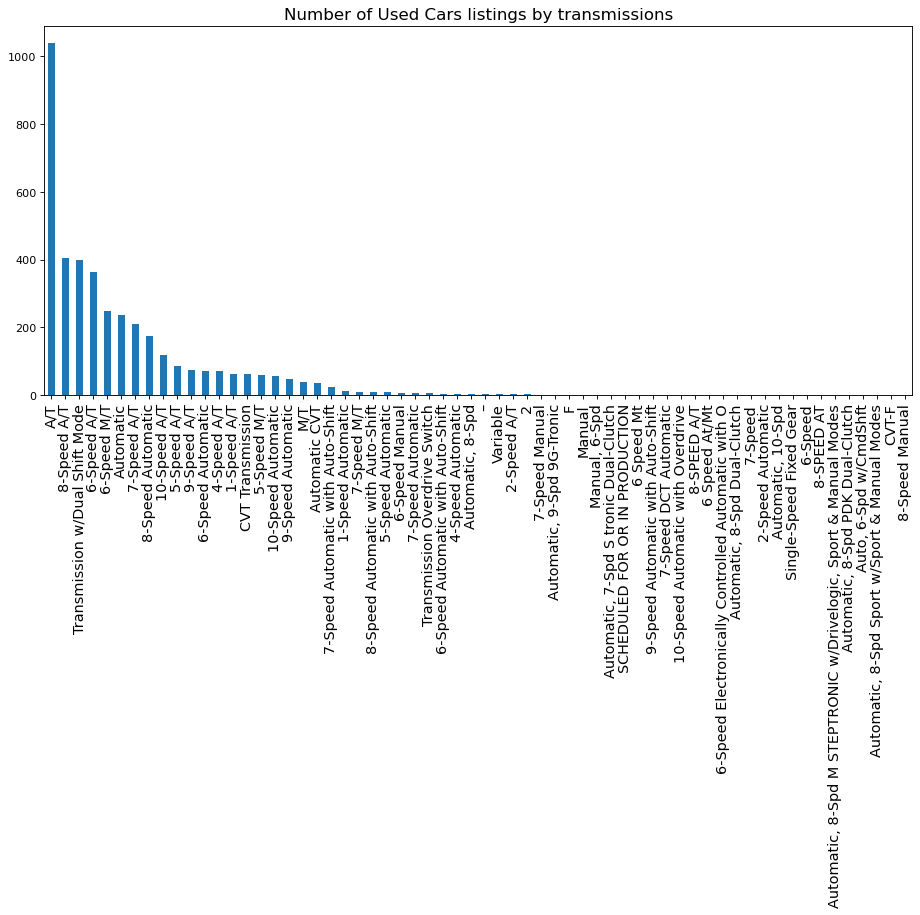

In [24]:
# Countplot for transmission

plt.figure(figsize=(14,6),dpi=80)
car_cap.transmission.value_counts().plot(kind='bar')
plt.xticks(rotation = 90,fontsize = 13)
plt.title('Number of Used Cars listings by transmissions',fontsize=15)
plt.show()

-  A/T cars in 2021 usually listed most among other cars with high price.

###### Model

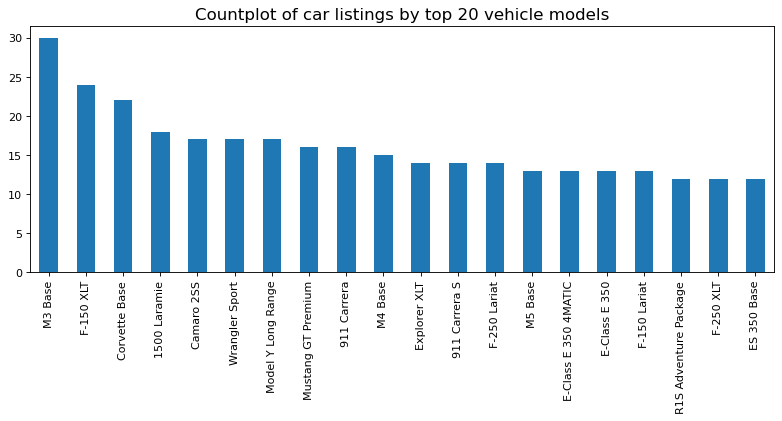

In [25]:
# 3. Top 20 models 

plt.figure(figsize=(12,4),dpi=80) 
car_cap['model'].value_counts()[:20].plot(kind='bar')
plt.title('Countplot of car listings by top 20 vehicle models',fontsize = 15)
plt.show()

- M3 BASE CAR car listed most among any other car an lowest is R1S Adventure package 

###### Brand

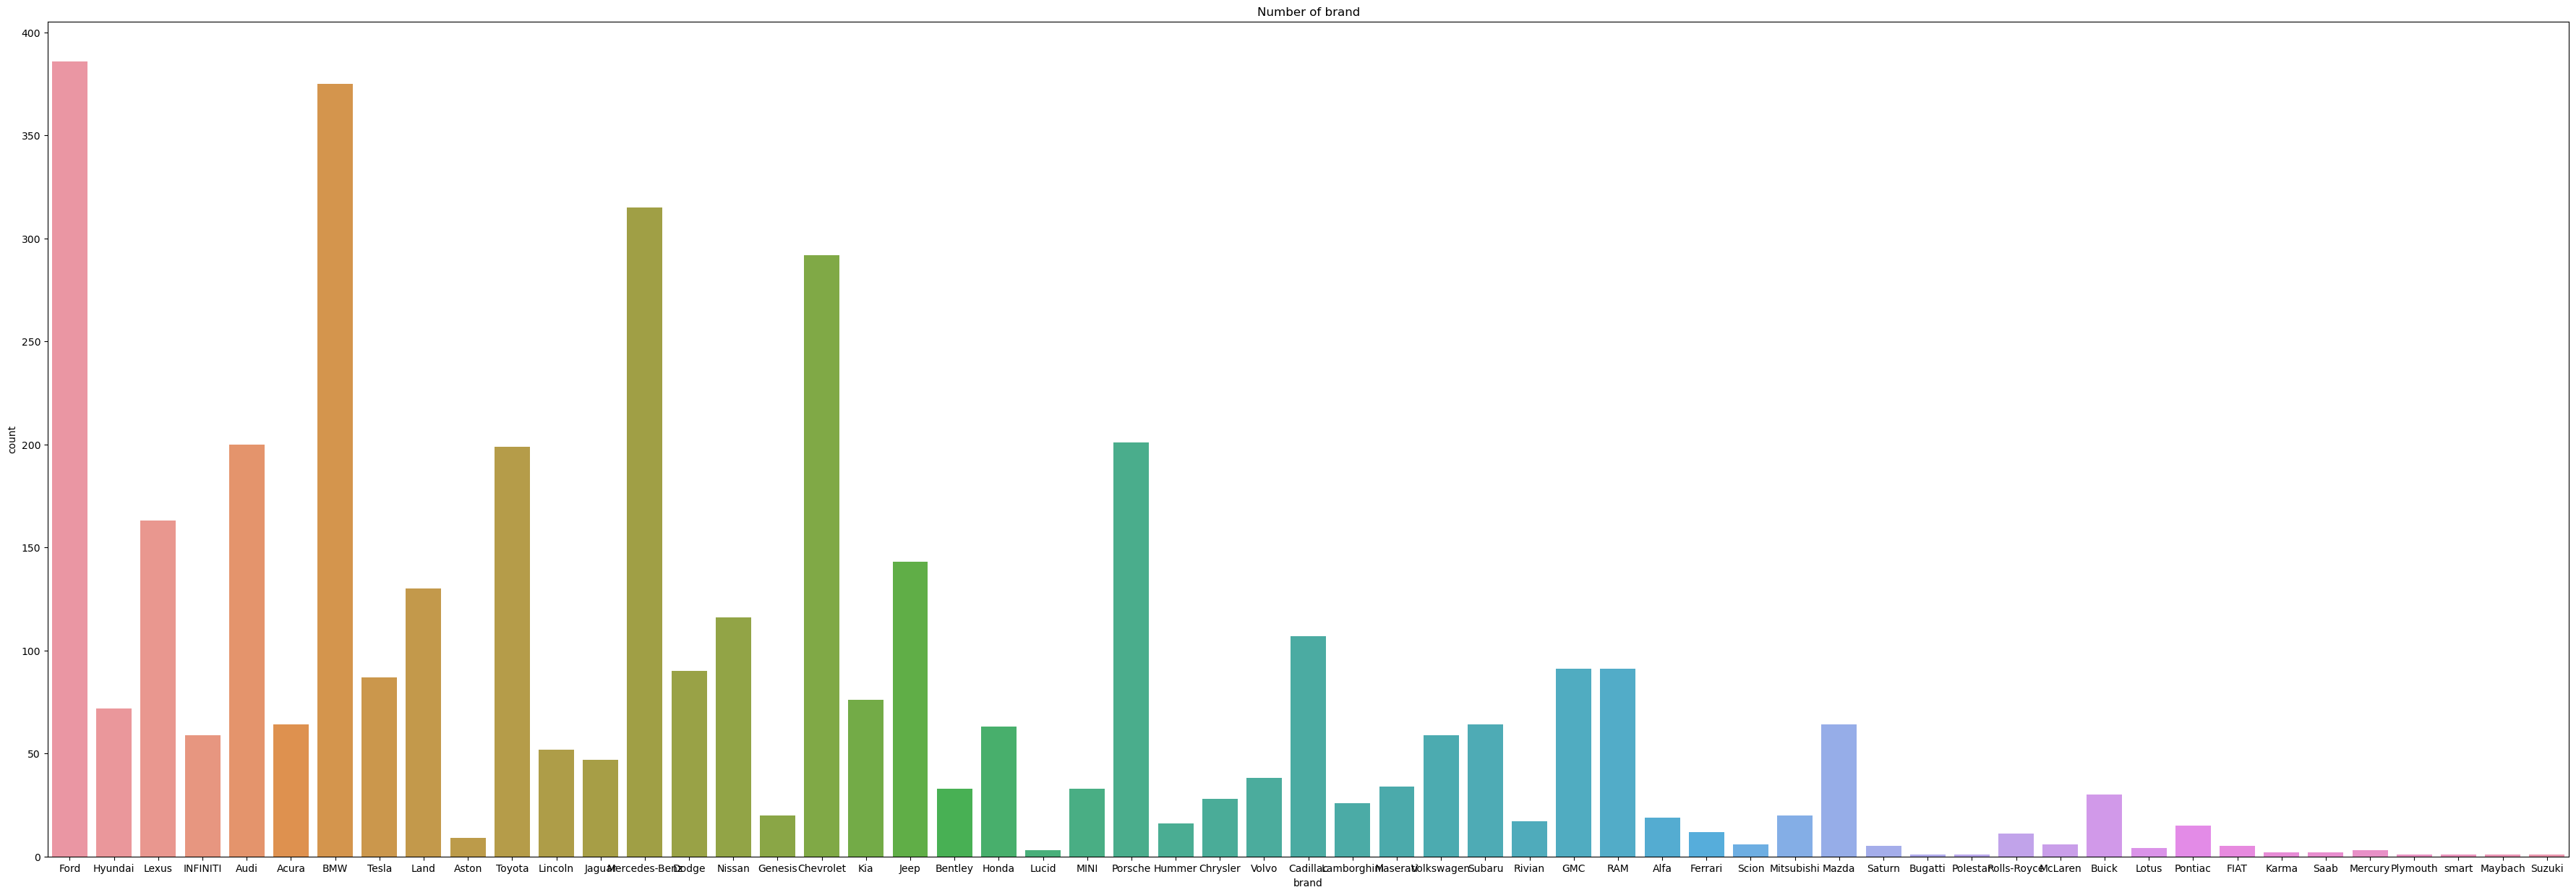

In [26]:
# univariate analysis on brand
plt.figure(figsize = (45,15))
sns.countplot(data = car_cap, x = "brand")
plt.title("Number of brand")
plt.show()

Brand name Ford is most populer followed by BMW and least favourite is Suzuki, maybech,Bugatti,polesta etc..

###### Accident reported 

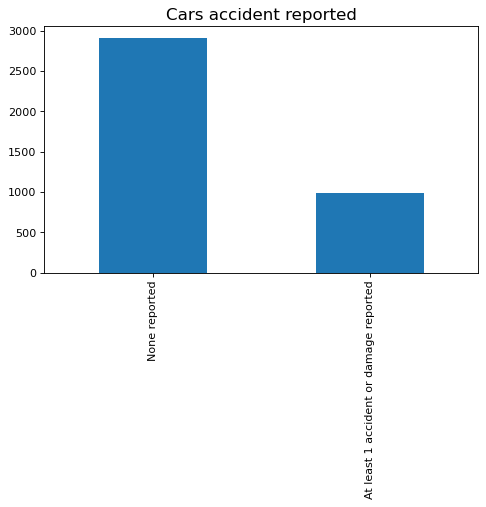

In [27]:
# countplot of the accident 

plt.figure(figsize=(7,4),dpi=80) 
car_cap['accident'].value_counts().plot(kind='bar')
plt.title('Cars accident reported',fontsize = 15)
plt.show()

-  There are few accident damage reported and majority of cases are not reported.

###### Exterior color and Interior color

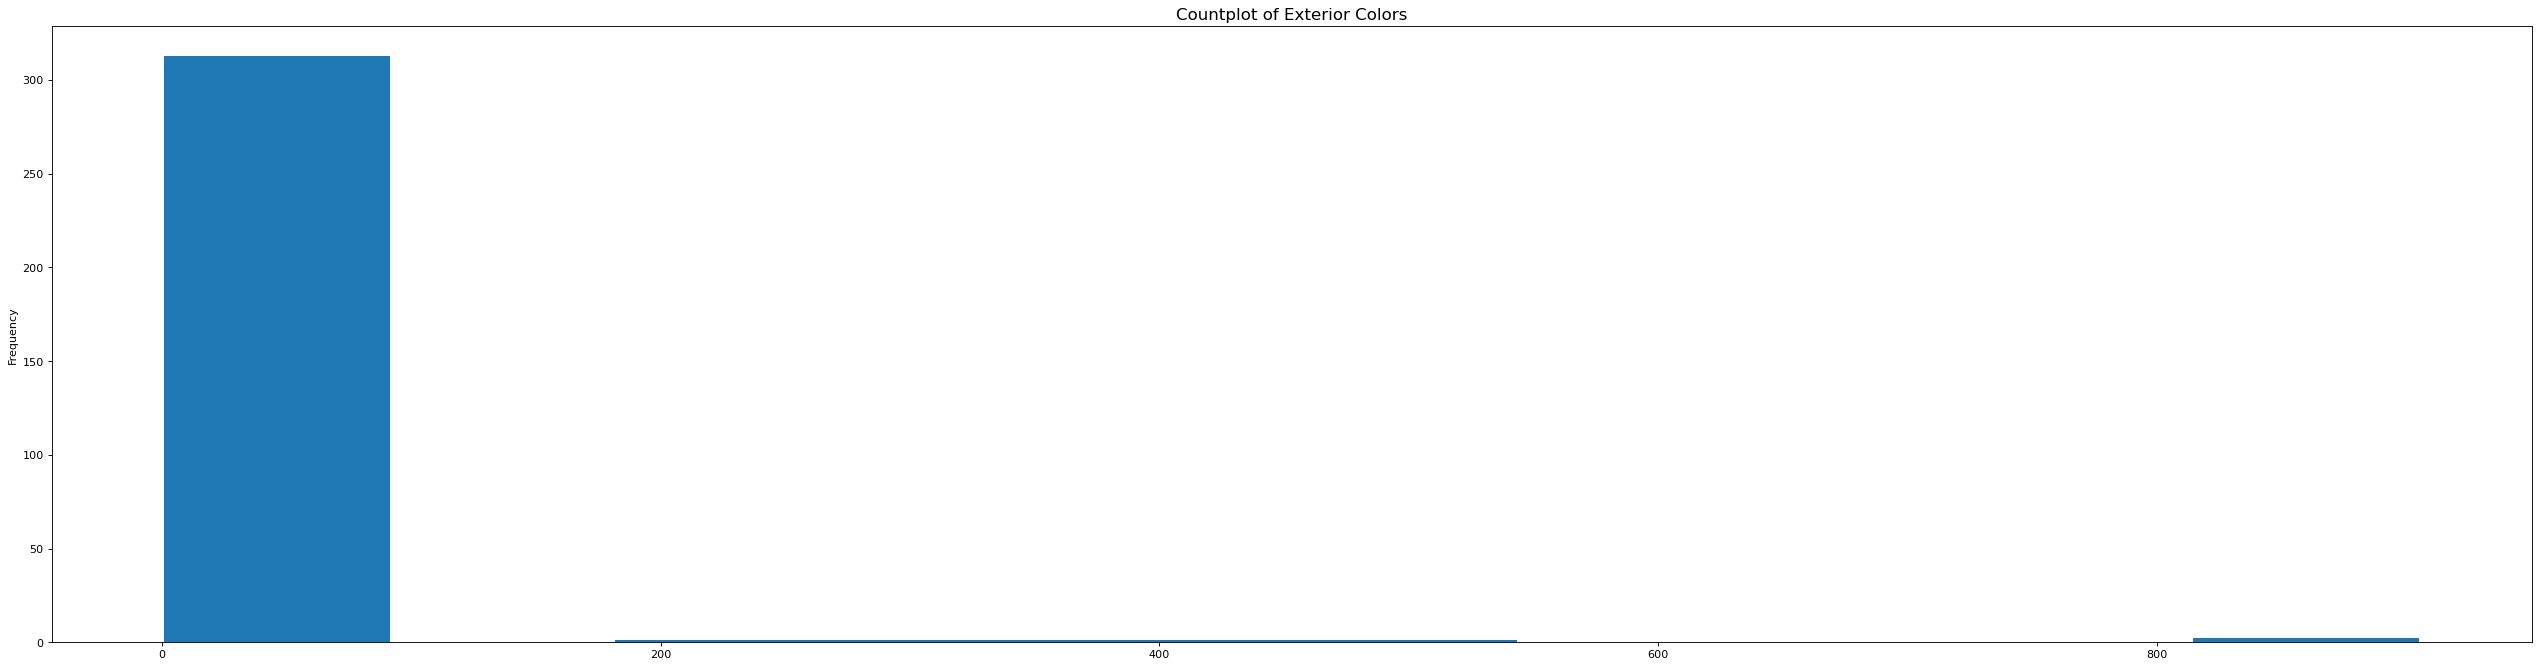

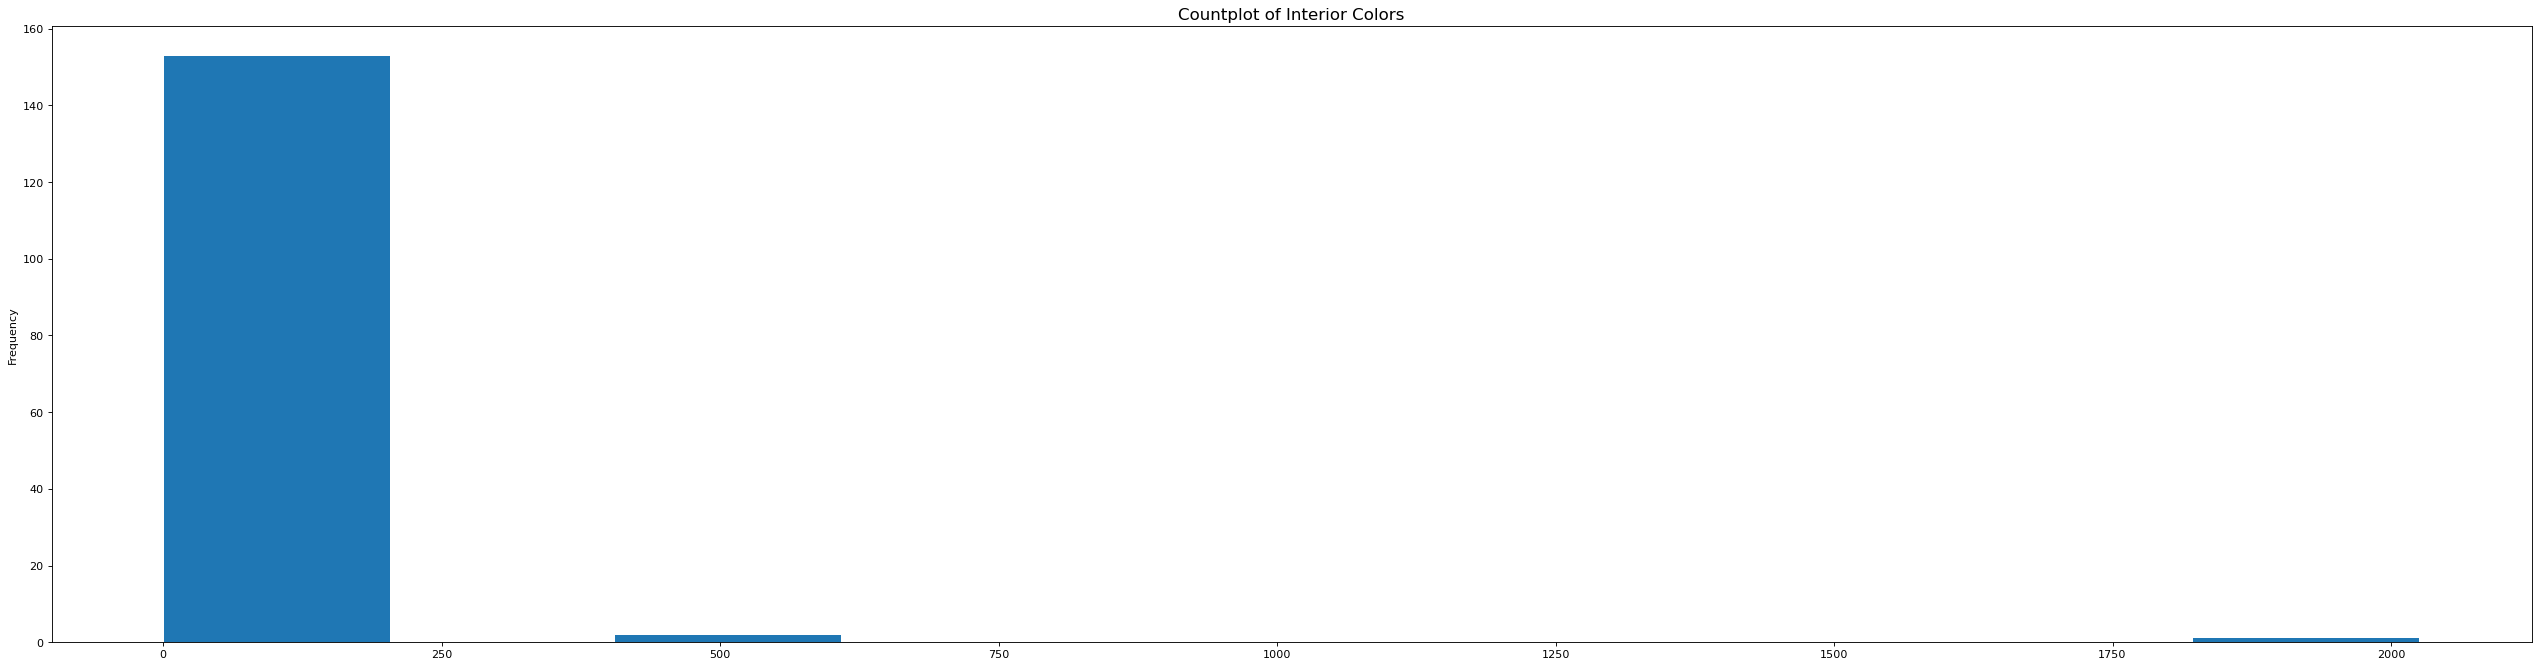

In [28]:
# countplot of the ext_col and int_col

plt.figure(figsize=(40,10),dpi=80) 
car_cap['ext_col'].value_counts().plot(kind='hist')
plt.title('Countplot of Exterior Colors',fontsize = 15)
plt.show()

plt.figure(figsize=(40,10),dpi=80) 
car_cap['int_col'].value_counts().plot(kind='hist')
plt.title('Countplot of Interior Colors',fontsize = 15)
plt.show()

- Most exterior color sold or listed is black followed by white.
- Only black color would be prefer as an nterior color AND Least interior is sports.

## Bivariate Analysis

###### Fuel type vs Price

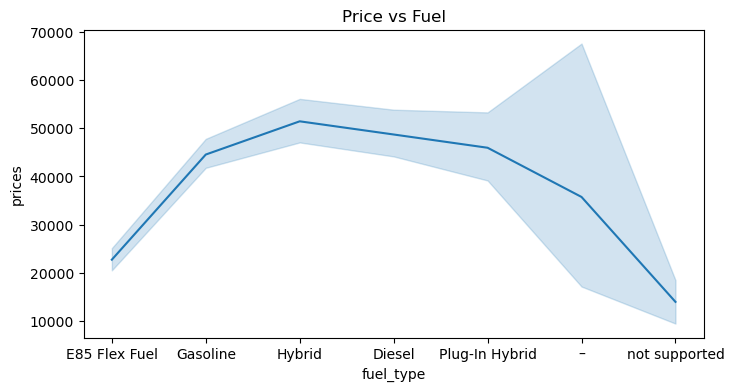

In [29]:
plt.figure(figsize = (8,4))
sns.lineplot(data = car_cap, x = "fuel_type", y = "prices")
plt.title("Price vs Fuel")
plt.show()

-  Gasolin cars are more populer than other cars. Althogh we have some missing data in this.

###### Brand vs Price

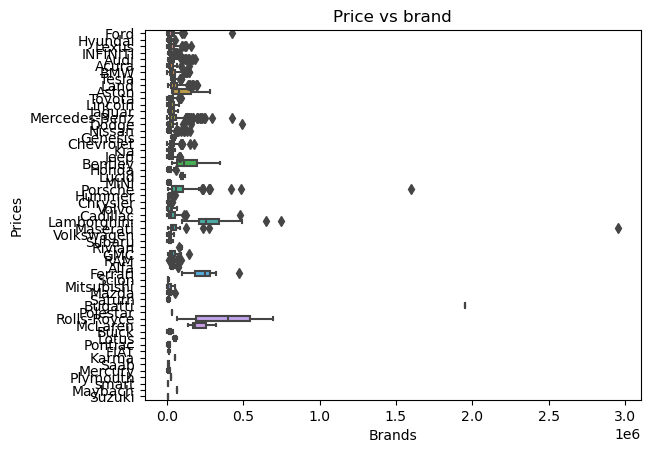

In [30]:
sns.boxplot(x='prices', y='brand', data=car_cap)
plt.title('Price vs brand')
plt.xlabel('Brands')
plt.ylabel('Prices')
plt.show()

#### Brand/model_year vs Price 

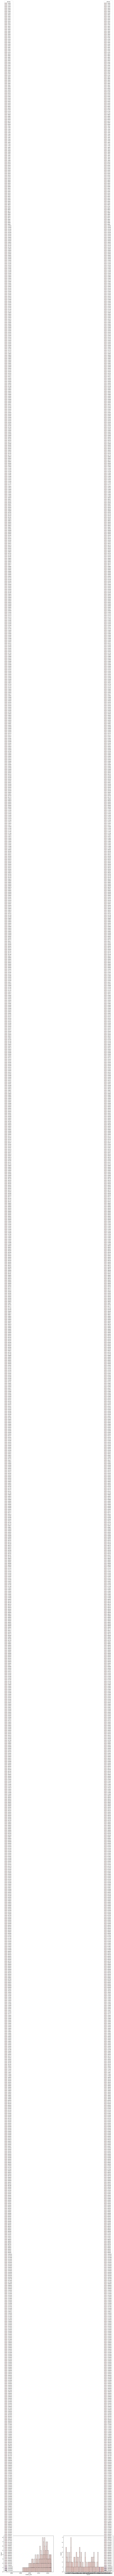

In [31]:
fig, axes = plt.subplots(1,2, figsize = (18,6))
sns.histplot(data = car_cap, x = 'brand', hue = 'prices', ax = axes[1])
sns.histplot(data = car_cap, x = 'model_year', hue = 'prices', ax = axes[0])
plt.show()

- Porsche and mercedes-Benz are two cars who are highly expensive car.
- There are some budget friendly cars also like smart and suzuki which has lowest price.


###### Accident- Milage vs Price

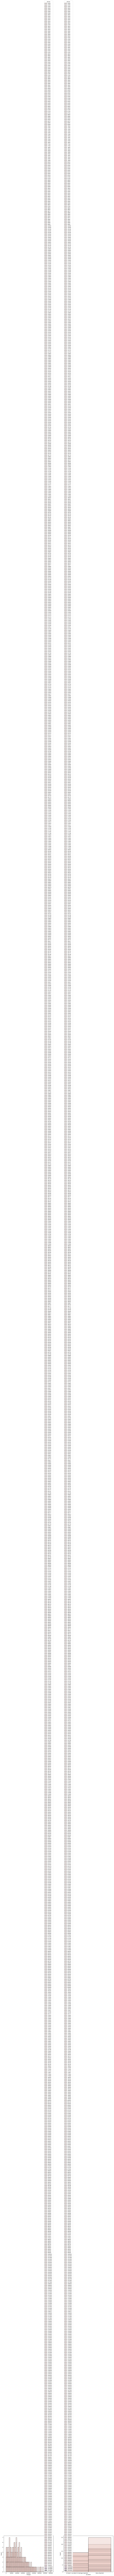

In [32]:
fig, axes = plt.subplots(1,2, figsize = (18,6))
sns.histplot(data = car_cap, x = 'accident', hue = 'prices', ax = axes[1])
sns.histplot(data = car_cap, x = 'milages', hue = 'prices', ax = axes[0])
plt.show()

- Most of the high price cars are not reported any incident about accident with max  price 144,446,793.
- Higher the Car milage high the price willl be.Highest milage in car is 32000 mi. with price of $3,336,658. 

#### Engine vs Price

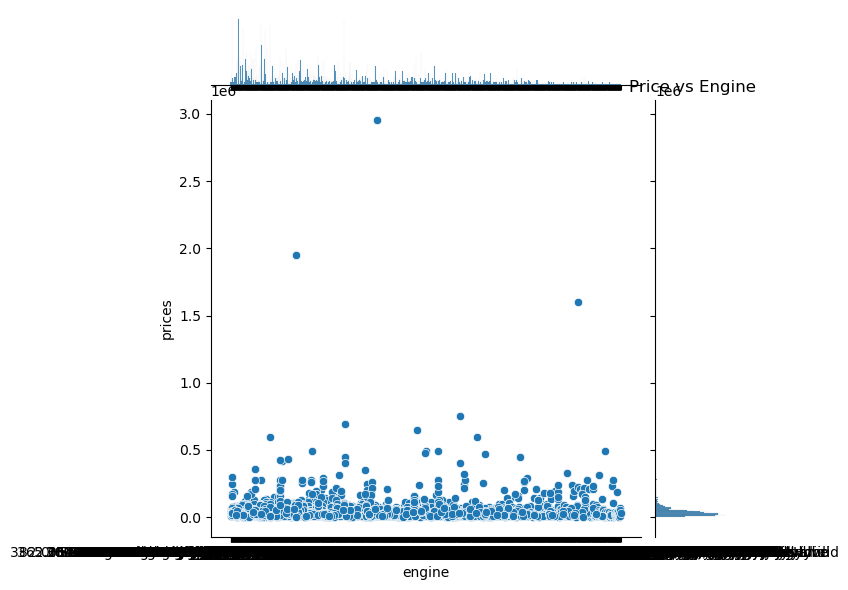

In [33]:
# Bivariate Analysis between prices and Transmission
sns.jointplot(x="engine", y="prices", data=car_cap, kind='scatter')
plt.title("Price vs Engine")
plt.show()

- Car engine is also reflecting price of the car, good engine has high price value. Cylinder Emgine Gasoline Fuel car with price of 2,996,582 is more populer listing one. 

#### Price vs Transmission

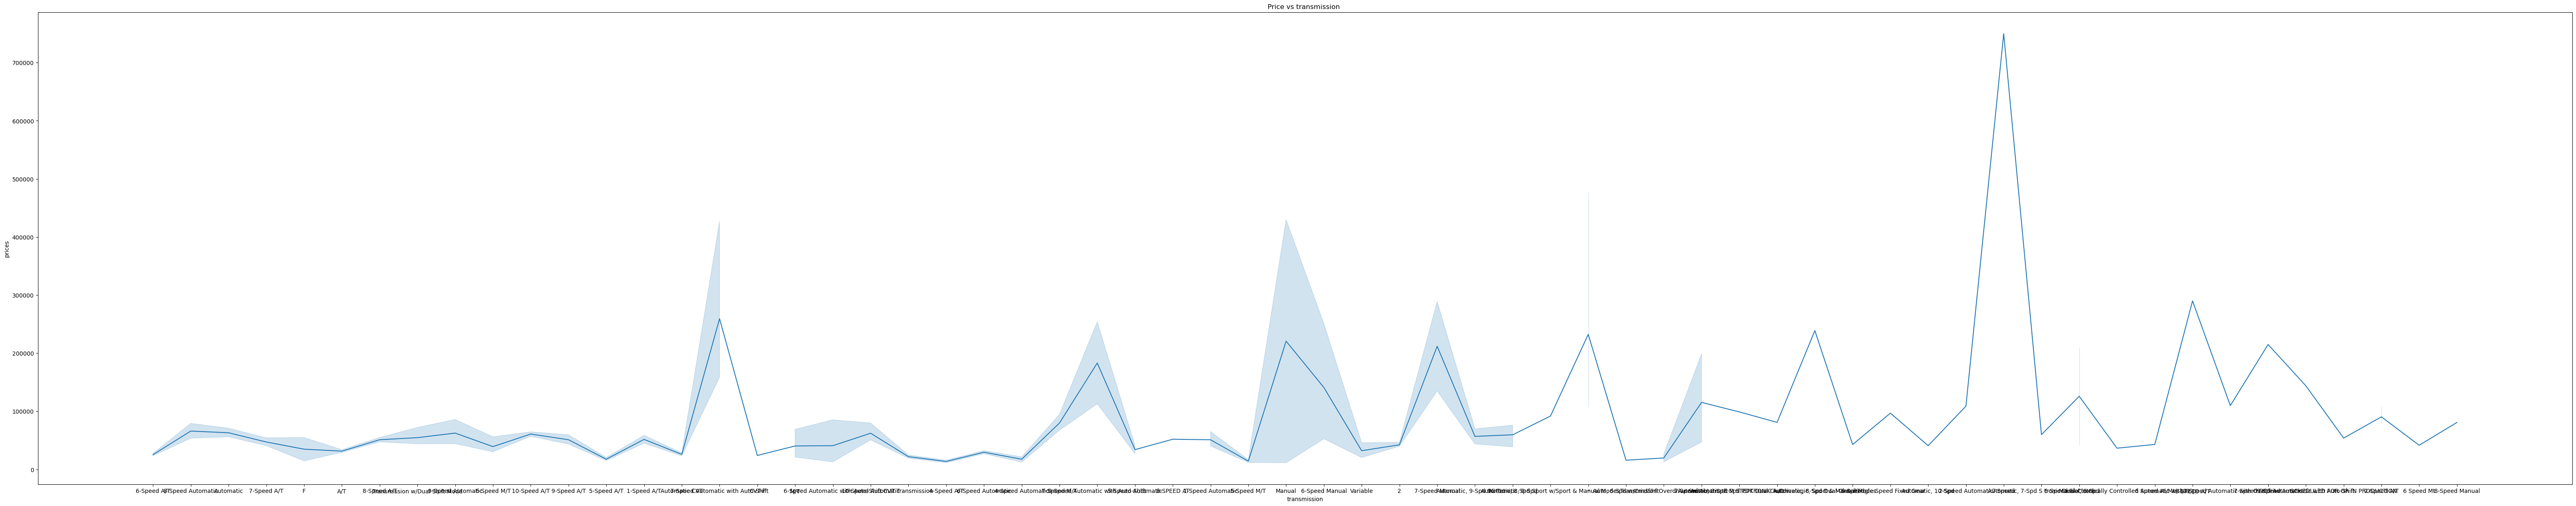

In [34]:
# Bivariate Analysis between Price and transmission 
plt.figure(figsize = (80,15))
sns.lineplot(data = car_cap, x = "transmission", y = "prices")
plt.title("Price vs transmission ")
plt.show()

- A/t (auto-transmission cars) has more price.
- auto, 6-speed w/cmdShift has lowest price car listing in cars.com

#### Model/ Model year vs. Price

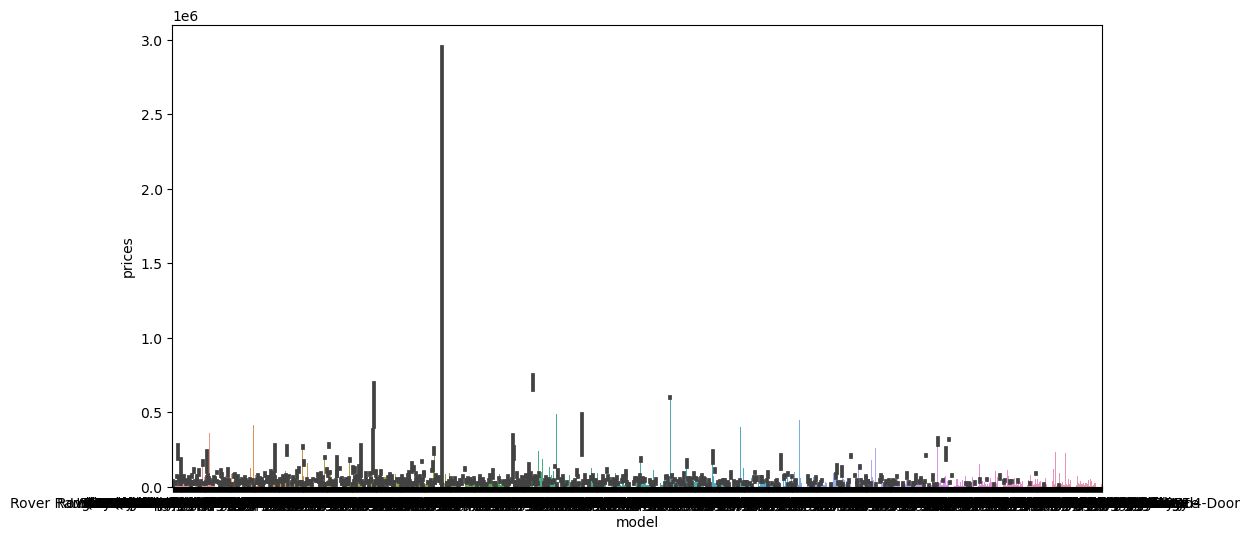

In [35]:
plt.figure(figsize = [12,6])
sns.barplot( 'model', 'prices',data = car_cap)
plt.show()

- Quattroporte base, model year 2005 has highest price so far.
-  Aviator Luxuary 2005 has lowest value of 2000.

In [36]:
car_cap.head(2)

brand                            model  model_year      fuel_type  \
0     Ford  Utility Police Interceptor Base        2013  E85 Flex Fuel   
1  Hyundai                     Palisade SEL        2021       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   

           ext_col int_col                                accident  \
0            Black   Black  At least 1 accident or damage reported   
1  Moonlight Cloud    Gray  At least 1 accident or damage reported   

  clean_title  prices  milages  
0         Yes   10300    51000  
1         Yes   38005    34742

## Multivariate analysis

model_year       AxesSubplot(0.125,0.77;0.110714x0.11)
prices        AxesSubplot(0.257857,0.77;0.110714x0.11)
milages       AxesSubplot(0.390714,0.77;0.110714x0.11)
dtype: object

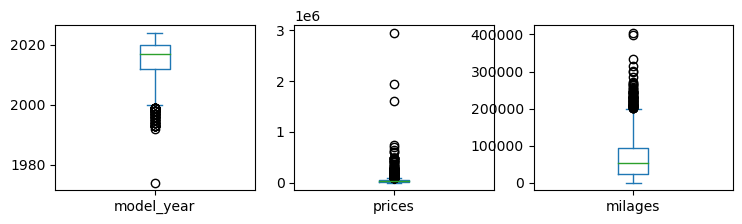

In [37]:
car_cap.plot(kind='box',subplots=True,layout=(6,6),figsize=(18,15))

- milage,  model_year, price are correlated to each other and also have some outliers present.

#### Heatmap for numeric value

<AxesSubplot:>

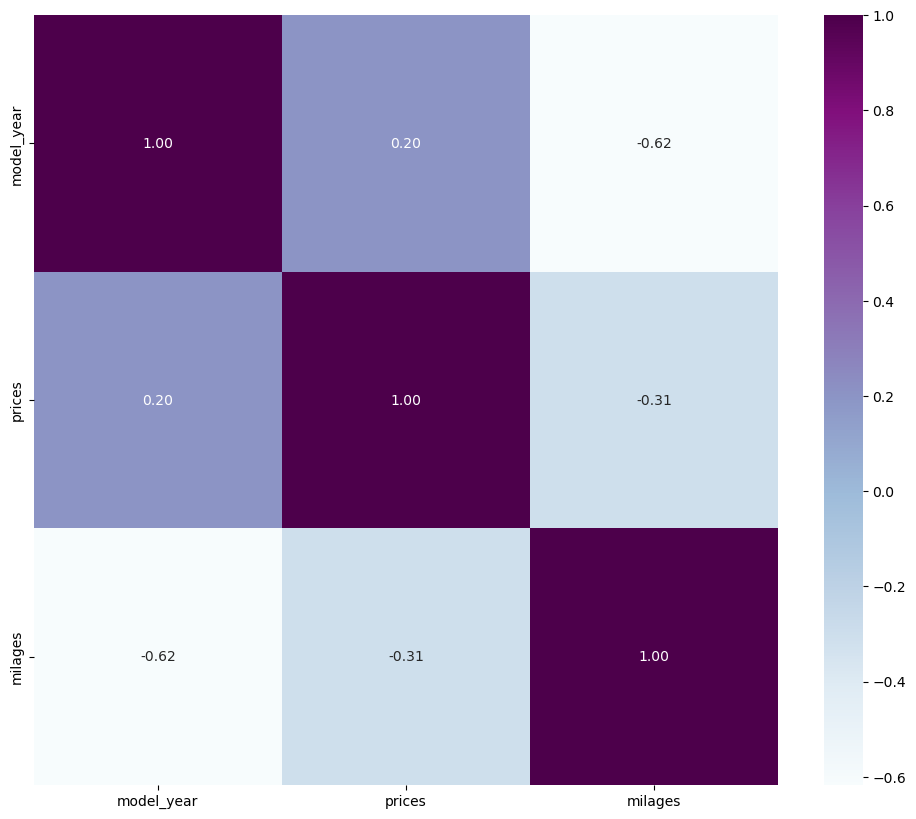

In [38]:
#Plotting the correlation of columns
Correlation=car_cap.corr()

plt.figure(figsize=[12,10])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='BuPu')

- milage,  model_year, price are correlated to each other.

#### Subplots for Categorical columns with count

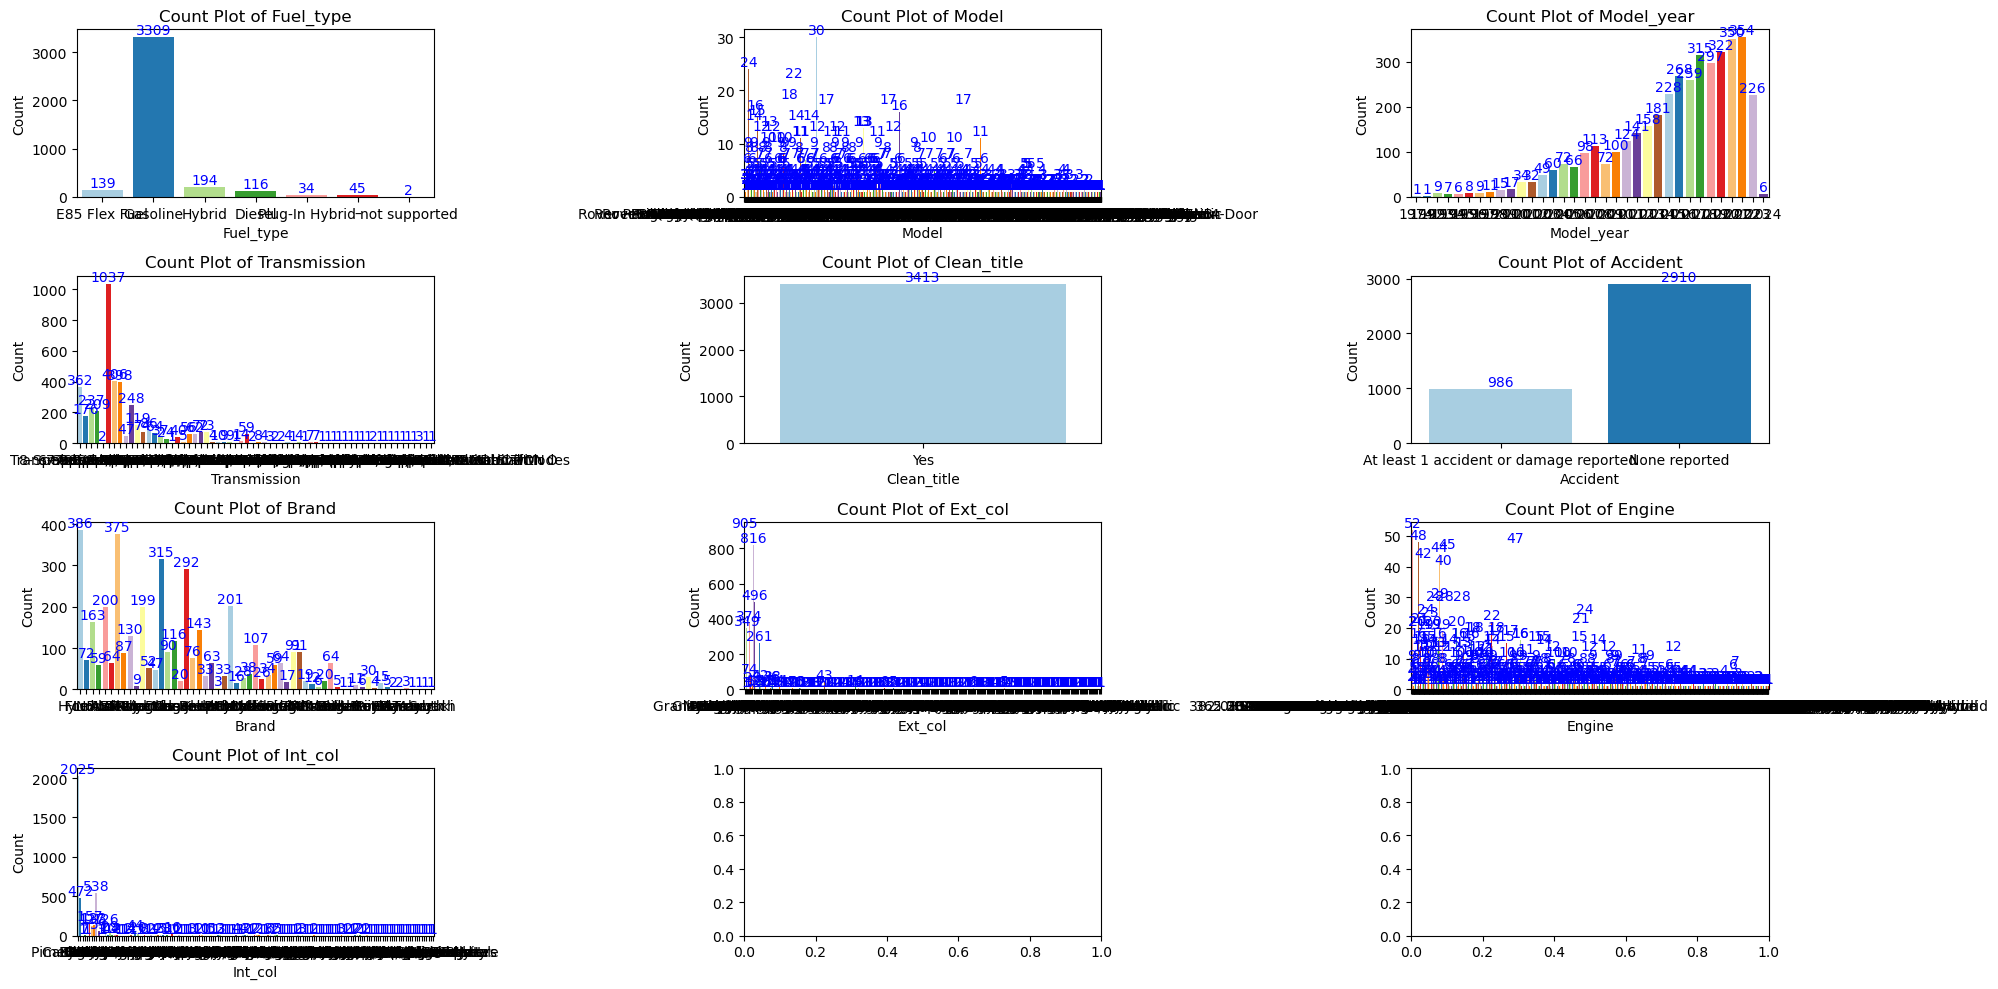

In [39]:
# Define the list of categorical columns to analyze
categorical_columns = ['fuel_type', 'model', 'model_year', 'transmission', 'clean_title',
                       'accident', 'brand', 'ext_col', 'engine','int_col']

# Calculate the number of rows and columns needed for subplots
num_cols = min(len(categorical_columns), 3)
num_rows = (len(categorical_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2.5))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    if i < len(categorical_columns):
        sns.countplot(x=car_cap[column], data=car_cap, palette='Paired', ax=axes[i], saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='blue', size=10)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Count')
    else:
        axes[i].axis('off')
        
# Adjust layout and show plots
plt.tight_layout()
plt.show()

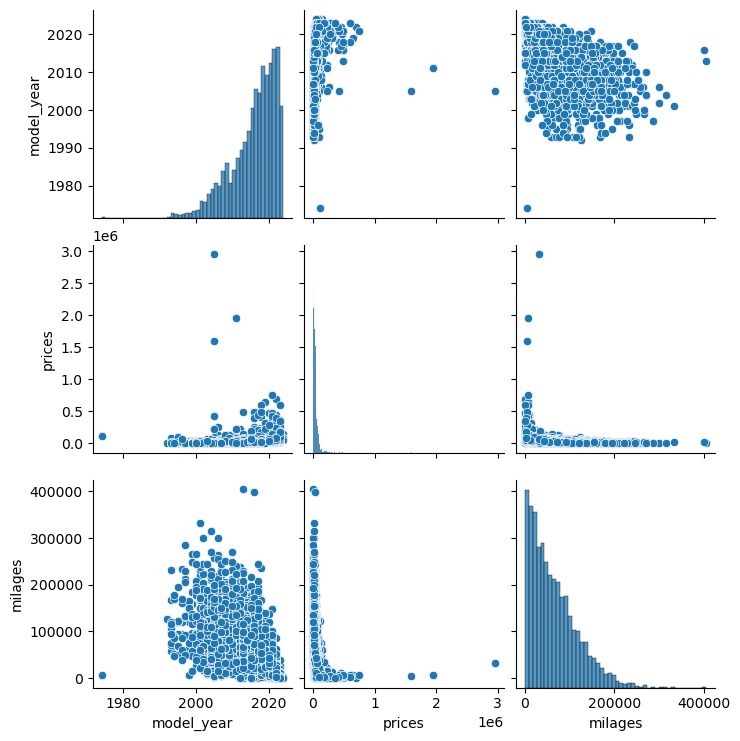

In [40]:
sns.pairplot(car_cap)

We get the insight from our data and now we will prepare our data for modeling by doing feature engineering. 

#### Saving the Model

In [41]:
import pickle

filename = 'Pre-processModeling car_cap.pkl'
pickle.dump(car_cap,open(filename,'wb'))